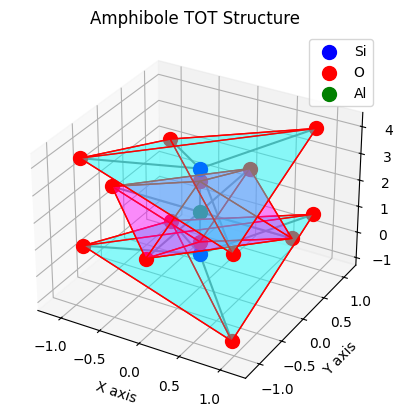

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Function to create a single tetrahedron centered at the origin
def create_tetrahedron(center=np.zeros(3), bond_length=1.61):
    O_atoms = bond_length * np.array([
        [1, 1, 1],
        [-1, -1, 1],
        [-1, 1, -1],
        [1, -1, -1]
    ]) / np.sqrt(3) + center
    Si_atom = center
    return Si_atom, O_atoms

# Function to create a single octahedron centered at the origin
def create_octahedron(center=np.zeros(3), bond_length=1.61):
    O_atoms = bond_length * np.array([
        [1, 0, 0],
        [-1, 0, 0],
        [0, 1, 0],
        [0, -1, 0],
        [0, 0, 1],
        [0, 0, -1]
    ]) / np.sqrt(2) + center
    Al_atom = center
    return Al_atom, O_atoms

# Function to plot a tetrahedron
def plot_tetrahedron(ax, Si, O):
    ax.scatter(*Si, color='blue', s=100, label='Si' if 'Si' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Si[0], atom[0]], [Si[1], atom[1]], [Si[2], atom[2]], color='gray')
    verts = [[O[0], O[1], O[2]], [O[0], O[1], O[3]], [O[0], O[2], O[3]], [O[1], O[2], O[3]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.25))

# Function to plot an octahedron
def plot_octahedron(ax, Al, O):
    ax.scatter(*Al, color='green', s=100, label='Al' if 'Al' not in ax.get_legend_handles_labels()[1] else "")
    for atom in O:
        ax.scatter(*atom, color='red', s=100, label='O' if 'O' not in ax.get_legend_handles_labels()[1] else "")
        ax.plot([Al[0], atom[0]], [Al[1], atom[1]], [Al[2], atom[2]], color='gray')
    verts = [
        [O[0], O[2], O[4]], [O[0], O[2], O[5]], [O[0], O[3], O[4]], [O[0], O[3], O[5]],
        [O[1], O[2], O[4]], [O[1], O[2], O[5]], [O[1], O[3], O[4]], [O[1], O[3], O[5]]
    ]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='magenta', linewidths=1, edgecolors='r', alpha=0.25))

# Function to create and plot the TOT structure
def plot_TOT_structure():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    bond_length = 1.61

    # Position of the tetrahedra and octahedra centers in the TOT structure
    tetra_centers = [np.array([0, 0, 0]), np.array([0, 0, 2 * bond_length])]
    octa_center = np.array([0, 0, bond_length])

    # Plot tetrahedra
    for center in tetra_centers:
        Si, O = create_tetrahedron(center, bond_length)
        plot_tetrahedron(ax, Si, O)

    # Plot octahedron
    Al, O = create_octahedron(octa_center, bond_length)
    plot_octahedron(ax, Al, O)

    # Labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Amphibole TOT Structure')

    plt.legend()
    plt.show()

# Plot the TOT structure
plot_TOT_structure()
